<a href="https://colab.research.google.com/github/saurav-kr/Amazon-Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Participants Name**

Saurav Kumar

Nikhil Kumar

Ananya Sarkar

Astha Padhi

Divyesh Roy

Utkarsh Kumar Gupta

Subham Kumar Sahoo

Prayag Raj Patra

Paulami Sur Roy

Project Name: Sentiment Analysis on Amazon Fine Food Reviews Dataset

**Github Link:** https://github.com/saurav-kr/Amazon-Sentiment-Analysis

**Heroku Link:** https://amazon-review-p1.herokuapp.com/

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df=pd.read_csv('/content/drive/My Drive/Project/Amazon.csv')
df.head()

,reviewerID,asin,reviewerName,helpful/0,helpful/1,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,0,0,I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,0,0,I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""",0,1,This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""",0,0,Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,1,1,"This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009"


In [156]:
df.isnull().sum()

reviewerID          0
asin                0
reviewerName      329
helpful/0           0
helpful/1           0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

In [157]:
df.dropna(inplace=True)

In [158]:
df.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful/0         0
helpful/1         0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36797 entries, 0 to 37125
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      36797 non-null  object
 1   asin            36797 non-null  object
 2   reviewerName    36797 non-null  object
 3   helpful/0       36797 non-null  int64 
 4   helpful/1       36797 non-null  int64 
 5   reviewText      36797 non-null  object
 6   overall         36797 non-null  int64 
 7   summary         36797 non-null  object
 8   unixReviewTime  36797 non-null  int64 
 9   reviewTime      36797 non-null  object
dtypes: int64(4), object(6)
memory usage: 3.1+ MB


In [160]:
df['sentiment']= np.where(df['overall']>4,'Positive','Negative')
df.head()

,reviewerID,asin,reviewerName,helpful/0,helpful/1,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,0,0,I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014",Negative
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,0,0,I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012",Positive
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""",0,1,This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013",Negative
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""",0,0,Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013",Negative
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,1,1,"This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009",Positive


In [161]:
df = df.drop(['reviewerID','asin','reviewerName','helpful/0','helpful/1','overall','summary','unixReviewTime','reviewTime'], axis=1)
df.head()

,reviewText,sentiment
0,I had big expectations because I love English ...,Negative
1,I highly recommend this series. It is a must f...,Positive
2,This one is a real snoozer. Don't believe anyt...,Negative
3,Mysteries are interesting. The tension betwee...,Negative
4,"This show always is excellent, as far as briti...",Positive


In [162]:
df['sentiment'].value_counts()

Positive    20688
Negative    16109
Name: sentiment, dtype: int64

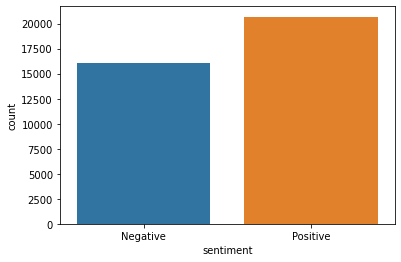

In [163]:
sns.countplot(df['sentiment'])
plt.show()

In [164]:
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=25)

In [185]:
print(x_train.shape)
print(x_test.shape)

(29437,)
(7360,)


In [186]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(x_train)

In [187]:
feat = vect.get_feature_names()

In [188]:
from wordcloud import WordCloud
cloud = WordCloud(width=1000, height=900).generate(" ".join(feat))

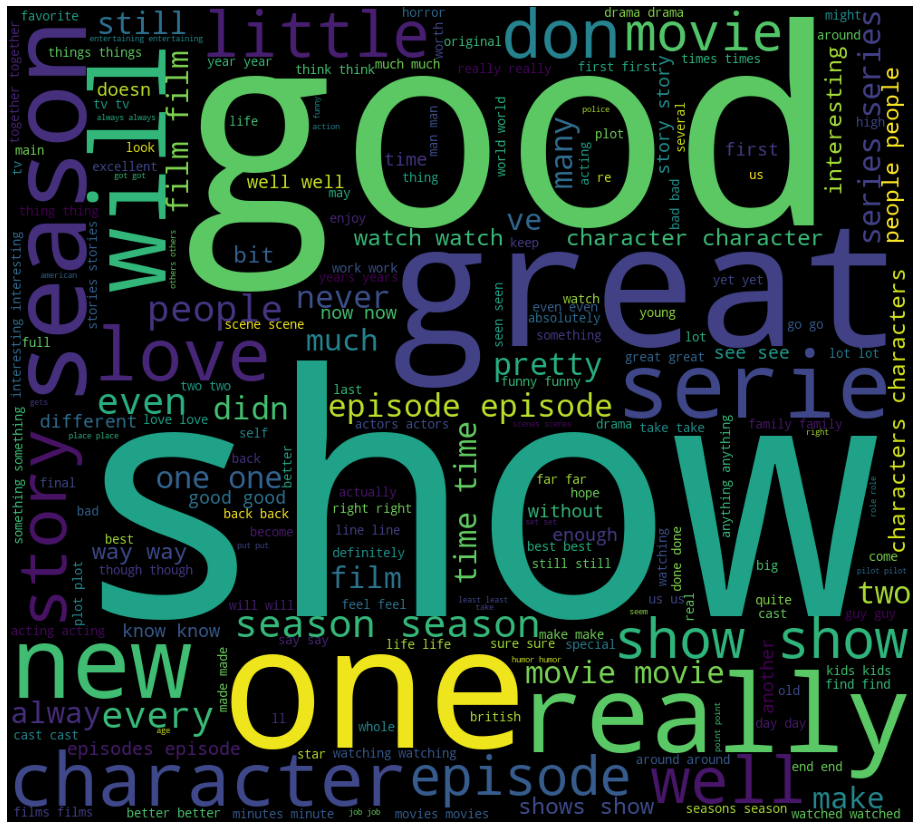

In [189]:
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [190]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [191]:
text_model = Pipeline([('tfidf',TfidfVectorizer(min_df = 5, ngram_range = (1,2))),('model',LogisticRegression())])

In [192]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=5, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scali

In [193]:
y_pred = text_model.predict(x_test)
y_pred

array(['Positive', 'Negative', 'Negative', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

In [194]:
y_test

array(['Positive', 'Negative', 'Negative', ..., 'Negative', 'Negative',
       'Positive'], dtype=object)

In [195]:
text_model.predict(['this show is boring'])

array(['Negative'], dtype=object)

In [196]:
text_model.predict(['this show is good'])

array(['Positive'], dtype=object)

In [197]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [198]:
accuracy_score(y_pred,y_test)*100

79.13043478260869

In [199]:
confusion_matrix(y_pred,y_test)

array([[2348,  679],
       [ 857, 3476]])

In [200]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.73      0.78      0.75      3027
    Positive       0.84      0.80      0.82      4333

    accuracy                           0.79      7360
   macro avg       0.78      0.79      0.79      7360
weighted avg       0.79      0.79      0.79      7360

